<br></br>
<h1><center>Assignment 08</h1></center>
<h1><center>Tree models</h1></center>
<h2><center>Benedek Dankó</h2></center>

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.model_selection import train_test_split

%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### 1. Prepare dataset

In [2]:
# load data:
data = pd.read_csv('..data/diabetes_data_upload.csv')

In [3]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df_dict = dict(zip([i for i in data.columns] , [pd.DataFrame(data[i].unique(), columns=[i]) for i in data.columns]))

In [5]:
df_dict # there are no nan values

{'Age':     Age
 0    40
 1    58
 2    41
 3    45
 4    60
 5    55
 6    57
 7    66
 8    67
 9    70
 10   44
 11   38
 12   35
 13   61
 14   54
 15   43
 16   62
 17   39
 18   48
 19   32
 20   42
 21   52
 22   53
 23   37
 24   49
 25   63
 26   30
 27   50
 28   46
 29   36
 30   51
 31   59
 32   65
 33   25
 34   47
 35   28
 36   68
 37   56
 38   31
 39   85
 40   90
 41   72
 42   69
 43   79
 44   34
 45   16
 46   33
 47   64
 48   27
 49   29
 50   26, 'Gender':    Gender
 0    Male
 1  Female, 'Polyuria':   Polyuria
 0       No
 1      Yes, 'Polydipsia':   Polydipsia
 0        Yes
 1         No, 'sudden weight loss':   sudden weight loss
 0                 No
 1                Yes, 'weakness':   weakness
 0      Yes
 1       No, 'Polyphagia':   Polyphagia
 0         No
 1        Yes, 'Genital thrush':   Genital thrush
 0             No
 1            Yes, 'visual blurring':   visual blurring
 0              No
 1             Yes, 'Itching':   Itching
 0     Yes
 1   

In [6]:
def my_encoder(array):
    '''
    Encoding of an array to numeric format.
    '''
    unique_items = list(set(array))
    n = len(unique_items)
    encoded_array = []
    for i in array:
        encoded_array.append(unique_items.index(i))
    return encoded_array

In [7]:
# convert data:
for name in list(data)[1:]:
    data[name] = my_encoder(data[name])

In [8]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0


#### 2. Train & visualize decision tree classifier

In [9]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [10]:
dt = tree.DecisionTreeClassifier(random_state=11).fit(X, Y)

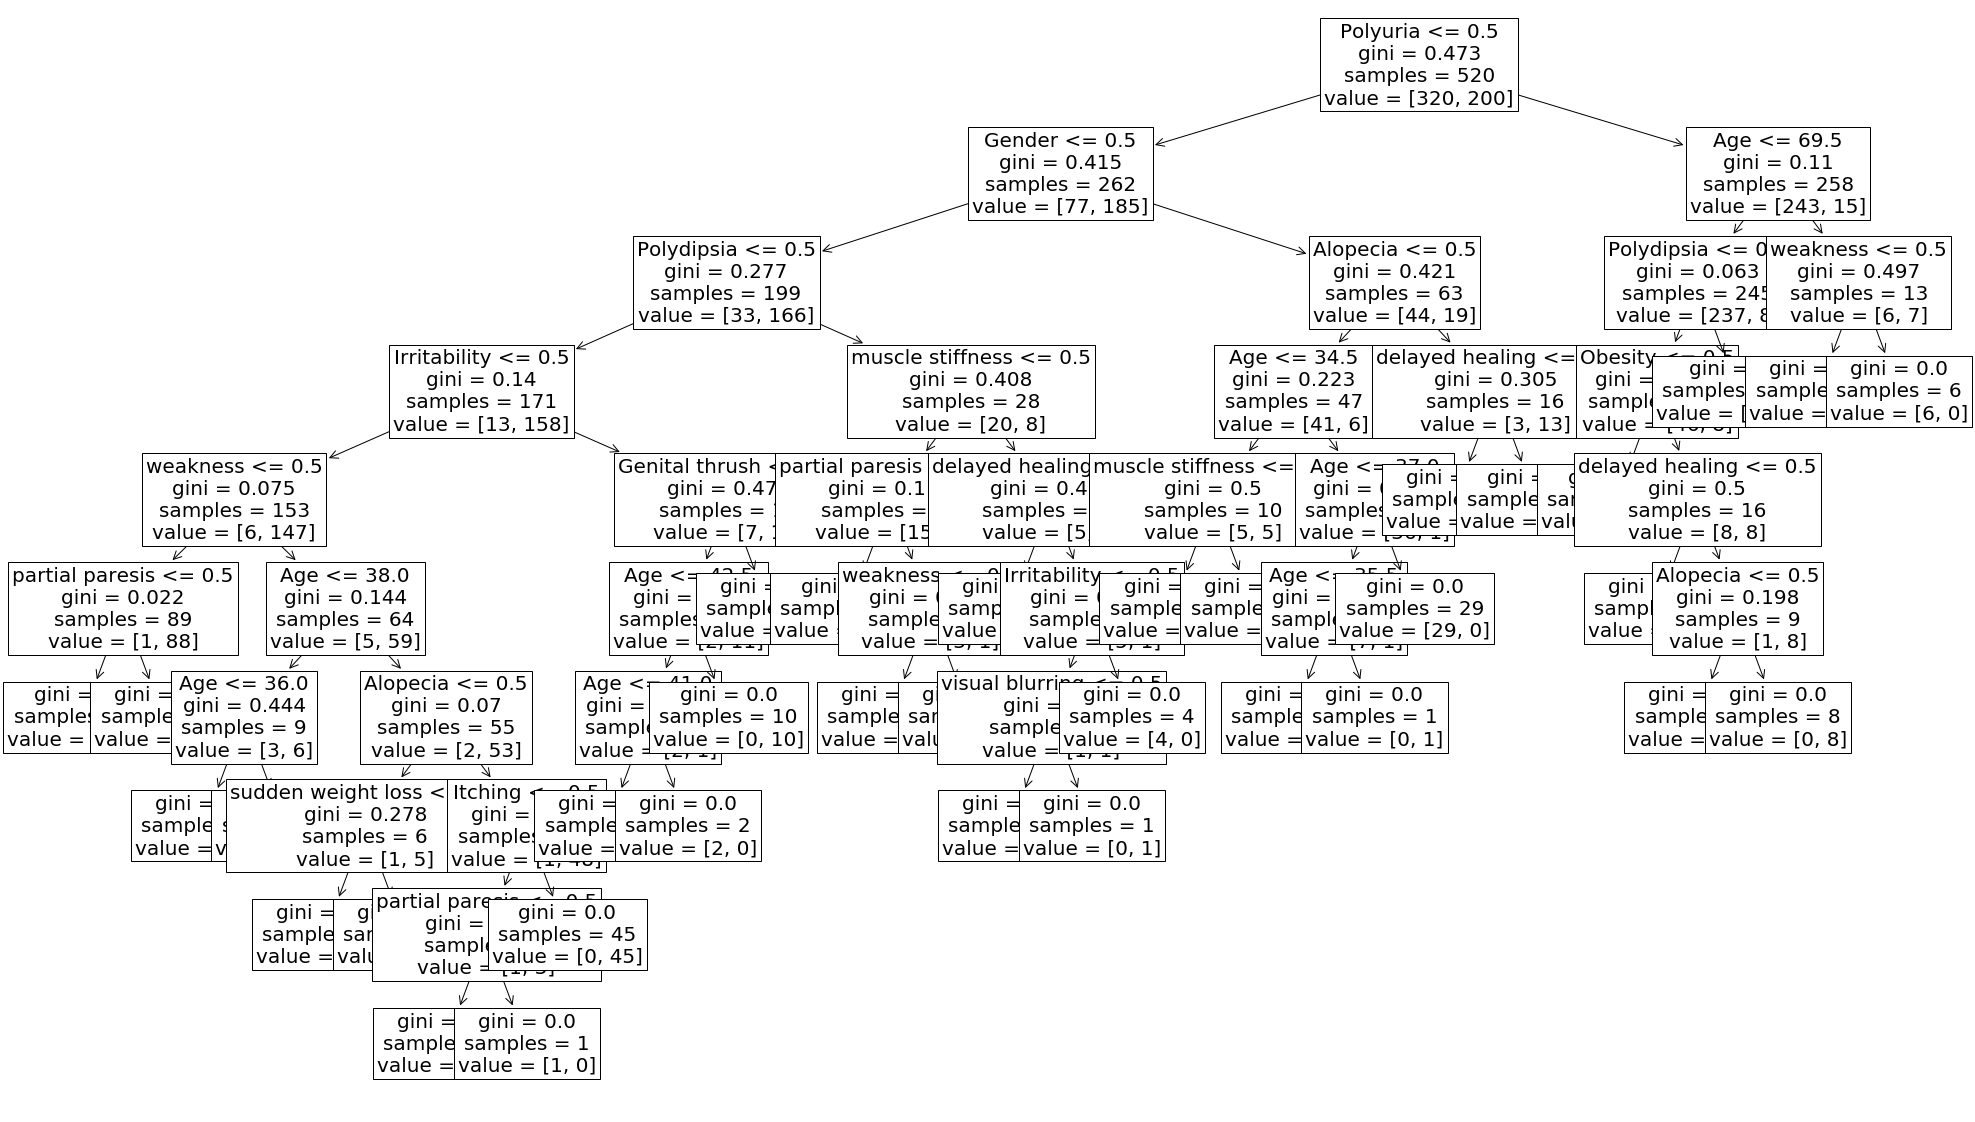

In [11]:
plt.figure(figsize=(34, 20))
tree.plot_tree(dt, fontsize=20, feature_names=data.columns) 
plt.show()

In [12]:
# Polyuria feature
N = 520
group1 = 200

1 - (group1/N)**2 - ((N - group1)/N)**2

0.47337278106508873

In [13]:
# Gender feature
N = 262
group1 = 185

1 - (group1/N)**2 - ((N - group1)/N)**2

0.4150399160888059

In [14]:
# Irritability feature
N = 171
group1 = 158

1 - (group1/N)**2 - ((N - group1)/N)**2

0.14048767142026614

I have not set tree depth limit, therefore, on the leafs of the tree there are usually only 1-2 samples. <br> <br>
The smaller the Gini impurity, the smoother the separation is. Going "down" on the tree, the Gini impurity score is getting smaller. The manually calculated Gini impurity scores seem OK (camparing to the decision tree's values).

#### 3.  Random forest feature importance

In [15]:
# set up model:
rf = RandomForestClassifier(random_state=42)
# fit data:
rf.fit(X, Y)

RandomForestClassifier(random_state=42)

In [16]:
X.columns # column names

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [17]:
rf.feature_importances_ # feature importance

array([0.09411742, 0.10893762, 0.20297758, 0.20043076, 0.04746457,
       0.0207828 , 0.02895726, 0.0199017 , 0.02700851, 0.02998212,
       0.04489669, 0.03246407, 0.05627632, 0.02500226, 0.04334057,
       0.01745975])

In [18]:
# store the 10 most important features:
top_features = [x for _,x in sorted(zip(rf.feature_importances_,X.columns), reverse=True)]

In [19]:
# create dataframe:
data = pd.DataFrame({'Feature': top_features, 
                     'Importance': sorted(rf.feature_importances_, reverse=True)})

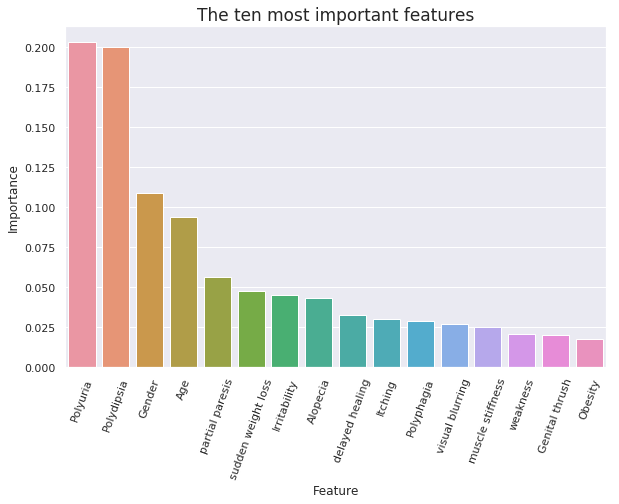

In [20]:
# plot the data:
sns.set(rc={'figure.figsize':(9.7,6.27)})
ax = sns.barplot(x='Feature', y='Importance', data=data)
plt.title('The ten most important features', fontsize=17)
plt.xticks(rotation=70)
plt.show()

#### 4. Evaluation

In [21]:
# convert data to array:
X_array = np.asarray(X)
Y_array = np.asarray(Y)

In [22]:
# set up models:
kf = KFold(n_splits=5)
rf = RandomForestClassifier(random_state=42)
dt = tree.DecisionTreeClassifier(random_state=11)

In [23]:
# run cross validations, predictions:
rf_predictions = []
dt_predictions = []
test_ys = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = Y_array[train_index], Y_array[test_index]
    rf.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    rf_predictions.append(rf.predict_proba(X_test))
    dt_predictions.append(dt.predict_proba(X_test))
    test_ys.append(y_test)

In [24]:
# "unpack" lists:
test_ys = [val for sublist in test_ys for val in sublist] 
rf_predictions = [val for sublist in rf_predictions for val in sublist[:,1]] 
dt_predictions = [val for sublist in dt_predictions for val in sublist[:,1]] 

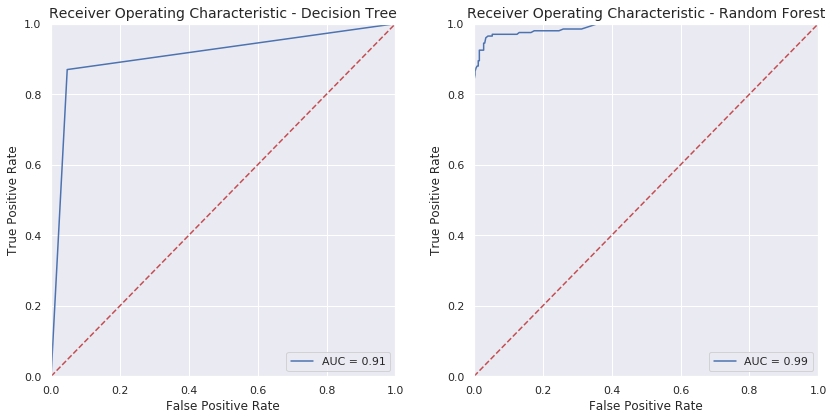

In [25]:
# plot the ROC curves:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


fpr_dt, tpr_dt, threshold_dt = metrics.roc_curve(test_ys, dt_predictions)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)

ax[0].axes.set_title('Receiver Operating Characteristic - Decision Tree', fontsize=14)
ax[0].plot(fpr_dt, tpr_dt, 'b', label = 'AUC = %0.2f' % roc_auc_dt)
ax[0].legend(loc = 'lower right')
ax[0].plot([0, 1], [0, 1],'r--')
ax[0].set_xlim([0, 1])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


fpr, tpr, threshold = metrics.roc_curve(test_ys, rf_predictions)
roc_auc = metrics.auc(fpr, tpr)

ax[1].axes.set_title('Receiver Operating Characteristic - Random Forest', fontsize=14)
ax[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax[1].legend(loc = 'lower right')
ax[1].plot([0, 1], [0, 1],'r--')
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 1])
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

fig.tight_layout()
plt.show()

The random forest model produced a better, almost perfect AUC score. <br>
The difference is between the two ROC curves is that the decision tree's ROC curve is actually an angular shape, because it produced binary predicted probabilities, in contrast with the random forest (which generates many trees, and calculates the probabilitites from these trees).

#### 5. Tuning model

In [26]:
# split the data:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
# calculate AUC score for Random Forest models with different max depth parameters:
estimators = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 500]
auc_scores_test = []
auc_scores_train = []

for val in estimators:
    rf = RandomForestClassifier(n_estimators=val)
    rf.fit(X_train, y_train)
    rf_predictions_test = rf.predict_proba(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, rf_predictions_test[:,1])
    auc_scores_test.append(metrics.auc(fpr, tpr))
    rf_predictions_train = rf.predict_proba(X_train)
    fpr, tpr, threshold = metrics.roc_curve(y_train, rf_predictions_train[:,1])
    auc_scores_train.append(metrics.auc(fpr, tpr))

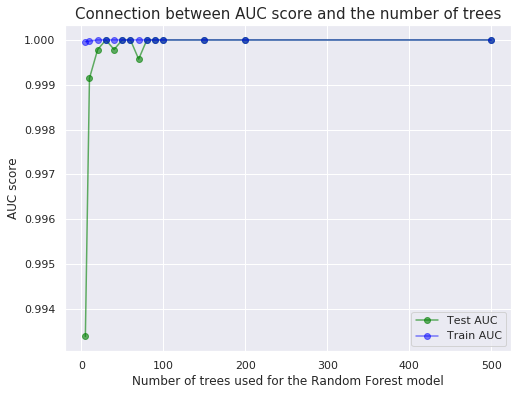

In [37]:
# plot the data:
plt.figure(figsize=(8, 6))
plt.plot(estimators, auc_scores_test, '-o', color='green', alpha=.6, label='Test AUC')
plt.plot(estimators, auc_scores_train, '-o', color='blue', alpha=.5, label='Train AUC')
plt.legend(loc = 'lower right')
plt.title('Connection between AUC score and the number of trees', fontsize='15')
plt.xlabel('Number of trees used for the Random Forest model')
plt.ylabel('AUC score')
plt.show()

Using more trees does not cause overfitting, according to these results. <br>
Although using more than ~ 50 trees does not really improves our model in this case.